# Prosper Loans Data Analysis
## by Mariam Haji

## Investigation Overview

A brief analysis on loans taken from Prosper. I will investigate and visualize relationships between borrowes APR, LoanStatus, ProsperScore, Occupation, ListingCategory, DelinquenciesLast7Years, CreditScoreRangeUpper.

## Dataset Overview

The Dataset contains 113,917 loans, each row has infomation on the borrow's APR, status, borrowed amount, borrowers occupation, etc. Irrelevant columns were dropped make the Dataset more accurate. Outliers were also removed to provide more reliable Data. This study will be analyzing factors that could inflence borrow's APR and which loans were taken by what type of borrowers.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

df = pd.read_csv('prosperLoanData.csv')

In [3]:
loans = df.copy()
loans.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 
            'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 
            'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 
            'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 
            'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 
            'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Loan Status

I started off by checking status of loans to have an idea of how many loans were current, completed, defaulted and past due.

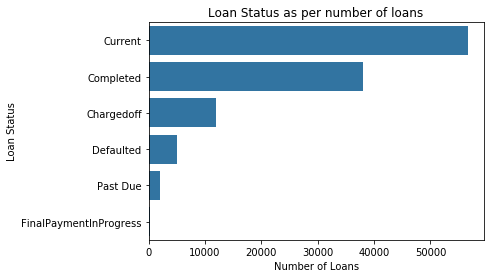

In [4]:
loans['LoanStatus'] = loans['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

# Convert to a categorical variable
loan_status_dict = ['Defaulted','Chargedoff', 'Past Due', 'Current', 'FinalPaymentInProgress', 'Completed']

ordered_loan_status = pd.api.types.CategoricalDtype(ordered = True, categories = loan_status_dict)

loans['LoanStatus'] = loans['LoanStatus'].astype(ordered_loan_status)

#Plot a barchart for the loan status
default_color = sb.color_palette()[0]

# Order the categorical variable type
cat_order = loans['LoanStatus'].value_counts().index

sb.countplot(data = loans, y = 'LoanStatus', color = default_color, order = cat_order)
plt.title('Loan Status as per number of loans')
plt.xlabel('Number of Loans')
plt.ylabel('Loan Status');

## Borrowers APR count

Observed the high counts of Borrowers APR which are around 0.358% and 0.356%.

In [5]:
bins = np.arange(0, loans['BorrowerAPR'].max(), 0.005)
plt.hist(data = loans, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count in percentage')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, loans['BorrowerAPR'].max()+0.05, 0.05));

## Prosper Score Count

I also observed the counts of propser score which showed most borrowers have a propser score of around 4.0 and most borrowers are between 2.0 and 10.0

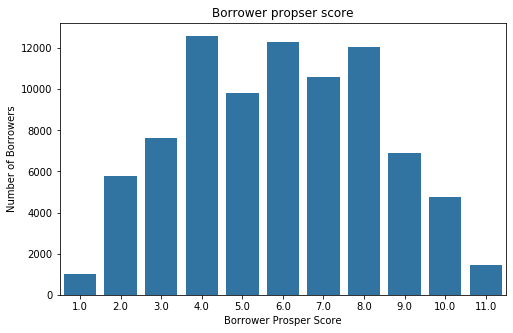

In [6]:
binsize = 1
bins = np.arange(0, loans['ProsperScore'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
sb.countplot(data = loans, x = 'ProsperScore', color = default_color)
plt.title('Borrower propser score')
plt.xlabel('Borrower Prosper Score')
plt.ylabel('Number of Borrowers');

## Features Scatter Plot

Scatter plot between the different categories show there is no much relation between them except for the ProsperScore and BorrowerAPR.

In [7]:
loans_vars = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 'CreditScoreRangeUpper']

samples = np.random.choice(loans.shape[0], 150, replace = False)
loan_samp = loans.loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = loans_vars, height = 2)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

## Borrowers vs Prosper Score

Borrower vs Prosper score shows the higher the score the better the rating the borrower recieved.

In [8]:
plt.figure(figsize = [10, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = loans, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, loans['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, loans['ProsperScore'].max()+1, 1)
plt.hist2d(data = loans, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');